In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Data.csv')

# 1. Loading data and preliminary analysis

### 1.1. Checking the target

In [2]:
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y = df['y']

In [3]:
y.info

<bound method Series.info of 0      32.175299
1       6.521285
2       5.688139
3       8.488786
4      63.570984
         ...    
145     8.145065
146    33.262930
147     1.656207
148     1.315763
149     1.421749
Name: y, Length: 150, dtype: float64>

In [4]:
y.shape

(150,)

In [5]:
y.describe

<bound method NDFrame.describe of 0      32.175299
1       6.521285
2       5.688139
3       8.488786
4      63.570984
         ...    
145     8.145065
146    33.262930
147     1.656207
148     1.315763
149     1.421749
Name: y, Length: 150, dtype: float64>

###### The target variable Y is numerical because it contains numerical values that represent a measurable quantity, whereas nominal data consists of categories without any inherent order or numerical value.

This dataset consists of 150 samples, each with 8 features (x1 to x8) and a target value (y). To choose between a regression or a classification task,  the nature of the target variable is considered.  The target variable 'y' is continuous, as it contains decimal values. Therefore, this dataset is suitable for a regression task, where you would try to predict the value of 'y' based on the values of the features x1 to x8. If the target variable were categorical or discrete (such as class labels), it would be suitable for a classification task.

### Frequecny Distribution of y

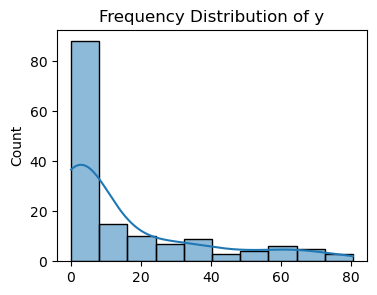

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.histplot(df['y'], kde=True, ax=ax)
ax.set(title='Frequency Distribution of y')
ax.set(xlabel=None)

plt.show()

The graph indicates that the distribution of 'y' is heavily right-skewed. This is consistent with the shape of the graph, which is skewed towards the right-hand side and the tail of the distribution also extending towards the right while the majority data points being clustered on the left.

### 1.2. Checking the features 

In [7]:
X.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.592109,0.545496,0.199054,2.370339,1.032510,1.137605,1.199802,-0.833456
1,0.911316,1.260952,0.446375,1.564526,0.820080,2.172268,1.441165,-0.373705
2,0.968683,3.744257,1.931173,1.472553,0.102181,4.712941,1.954805,1.828992
3,0.748656,2.741351,1.790573,1.696788,0.464028,3.490008,0.948294,1.326545
4,0.320502,3.196858,1.050494,2.813036,0.204284,3.517361,1.273237,0.846210


In [8]:
X.shape

(150, 8)

#### X Features contain, 150 rows and 8 columns.

In [9]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.526873,2.532959,1.004755,1.437147,0.608091,3.059833,1.005223,0.396664
std,0.287178,1.366323,0.591567,0.869658,0.365670,1.405730,0.418172,0.666874
min,0.000789,0.039299,0.022259,0.034008,0.000504,0.324586,0.097891,-1.012279
25%,0.286739,1.467144,0.484289,0.685930,0.263076,1.988572,0.748112,-0.100801
50%,0.538521,2.489126,1.025886,1.410161,0.628974,2.985679,0.979791,0.389450
75%,0.776970,3.650754,1.504459,2.163303,0.920787,4.241689,1.292235,0.892501
max,0.986514,4.981110,1.976849,2.993408,1.293620,5.960314,1.954805,1.910219


In [10]:
# Calculating the mean and standard deviation of each feature
means = X.mean()
stddev = X.std()

# Checking if features in X are standardized
tolerance = 1e-6
standardized = np.allclose(means, 0, atol=tolerance) and np.allclose(stddev, 1, 
                                                                     atol=tolerance)

# As observed from block 9 and 10, the features are not standardized.

standardized

False

## 2. Training and testing a machine learning pipeline

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import randint


In [12]:
# Splitting data into tuning and validation sets allows us to estimate 
# how well a machine learning model will perform on new, 
# unseen data. This helps with model selection and hyperparameter tuning.
X_tuning, X_val, y_tuning, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, shuffle=True)

# Splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_tuning, y_tuning, test_size=0.3, random_state=42)

# Initializing the k-fold cross-validator
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Defining the pipelines for each model OLS, Ridge, Random Forest to provide the best results.
# Pipelines use StandardScaler() to standardize feature data, improving model performance 
# on similar scales. 
pipelines = {
    "linear_regression": Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('lm', LinearRegression())
    ]),
    "ridge_regression": Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('ridge', Ridge(alpha=1))
    ]),
    "random_forest": Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=40, max_depth=5))
    ])
}

# K-fold cross-validation to assess model performance to detect 
# overfitting/underfitting, and helps choosing the best model.
R2_train = {}
R2_test = {}
validation_scores = {}
average_scores = {}

for name, pipeline in pipelines.items():
    R2_train_scores = []
    R2_test_scores = []
    validation_scores[name] = []
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]

        pipeline.fit(X_train_kf, y_train_kf.ravel())
        
        R2_train_scores.append(pipeline.score(X_train_kf, y_train_kf))
        R2_test_scores.append(pipeline.score(X_test_kf, y_test_kf))
        validation_score = pipeline.score(X_val, y_val)
        validation_scores[name].append(validation_score)
                
    R2_train[name] = np.mean(R2_train_scores)
    R2_test[name] = np.mean(R2_test_scores)
    average_scores[name] = (R2_test[name] + np.mean(validation_scores[name])) / 2
    print(f"\nMean R2 on train for {name}: {R2_train[name]}")
    print(f"\nMean R2 on test for {name}: {R2_test[name]}")
    print(f"\nAverage score for {name}: {average_scores[name]}")
    print(f"\nValidation scores for {name}: {validation_scores[name]}")
    
# The best model is chosen with the maximum average score of Validation 
# and R2 among all models
best_model_name = max(average_scores, key=average_scores.get)
best_model_pipeline = pipelines[best_model_name]
print(f"\nBest model: {best_model_name}")


Mean R2 on train for linear_regression: 0.9942248025852208

Mean R2 on test for linear_regression: 0.9388495456072871

Average score for linear_regression: 0.9275485461931761

Validation scores for linear_regression: [0.928010072554068, 0.890277416315063, 0.9335900687495294, 0.9092142536593047, 0.9224679289236651, 0.9200558172208402, 0.9213520249175855, 0.9350063454112361, 0.8939483028382228, 0.908553237201136]

Mean R2 on train for ridge_regression: 0.9891365510082697

Mean R2 on test for ridge_regression: 0.953698057264502

Average score for ridge_regression: 0.9577416448635763

Validation scores for ridge_regression: [0.9609878595409819, 0.9572000295958168, 0.9659421464274639, 0.9600183624331248, 0.9648675423828695, 0.9589017589459066, 0.9638043637029293, 0.9628466141936816, 0.96138804303597, 0.9618956043677619]

Mean R2 on train for random_forest: 0.9963995021421933

Mean R2 on test for random_forest: 0.9807091685864882

Average score for random_forest: 0.9814476433987587

Validat

#### Result Interpretation:
- R2 and Validation score for Random Forest yilds the highest results.
- Hghest Average Results calculated (R2 + Validation)/2 allows us to choose the best model further on.

#### Overfitting & Underfitting:
- Difference between R2 test and train for Randomforest suggest that the model fits well.
- Further observing the data with 150 observations and 8 features, overfitting can least likely be expected
- The model shows slight overfitting, with high R2 scores for both train (0.9964) and test (0.9807) sets.
- As untuned data also utilizes cross validation, hyper parameter tuning will be introduced further.

In [13]:
from sklearn.metrics import mean_squared_error

# Training the tuned random forest regressor on the entire training set
rf = pipelines["random_forest"]["rf"]
rf.fit(X_train, y_train.ravel())

# Prediction on the test set
y_pred = rf.predict(X_test)

# Finding the MSE of random forest regressor
rf_mse = mean_squared_error(y_test, y_pred)

# Calculating the baseline error which is the mean the target variable
baseline_error = mean_squared_error(y_test, [y_test.mean()] * len(y_test))

# Finding the improvement percentage of the random forest regressor over the baseline 
# error results
improvement = (baseline_error - rf_mse) / baseline_error * 100

print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Baseline error: {baseline_error:.4f}")
print(f"Improvement % over the baseline model: {improvement:.2f}%")

Random Forest MSE: 0.6602
Baseline error: 376.7447
Improvement % over the baseline model: 99.82%


#### Comparing the baseline model with RF model to determine its effectivenes:
- The block of code calculates the MSE for both Randomforest and Baseline model
- MSE of RF = 0.6602 and MSE of Baseline Error = 376.7447 (Lower value is better)
- The RF model improves by 99.82% over the baseline model.

## 3. Tuning the proposed machine learning pipeline

In [14]:
X.shape

(150, 8)

#### Final Feature Space, High or Low Dimensional?
- 150 Observations and 8 features suggests the dataset as low dimensional as Observations > Features
- With degree-2 polynomial transformation 45 new features are created, which also suggests Observations > Features
- All the factors lead to the Final Feature Space being <b><i>Low Dimensional</i></b>

### Tuning our model

As seen from results in out untuned model it performs well. But further tuning can be done on Random Forest Regressor to achieve a better performing model.

In [15]:
# Using RandomizedSearchCV to find the best hyper parameters to tune the RF model.
from sklearn.model_selection import RandomizedSearchCV

# Model has been split into train and test, k-fold, validation set to be tuned.
# Splitting data into tuning and validation sets allows us to estimate how well 
# a machine learning model will perform on new, unseen data.
# This helps with model selection and hyperparameter tuning.
X_tuning, X_val, y_tuning, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, shuffle=True)

# Splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_tuning, y_tuning, test_size=0.3, random_state=42)

# Initializing the k-fold cross-validator
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Defining the pipeline for the tuned Random Forest model
tuned_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(2)),
    ('rf', RandomForestRegressor(random_state=40))
])

# Defining the parameter grid for RandomizedSearchCV to tune the data
param_dist = {
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': randint(1, 10),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 10),
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# Initializing RandomizedSearchCV with the tuned_rf_pipeline, parameter grid, 
# and KFold cross-validator
random_search = RandomizedSearchCV(tuned_rf_pipeline, param_distributions=param_dist, 
                                   n_iter=50, cv=kf, scoring='r2', 
                                   n_jobs=-1, random_state=42, verbose=1)

# Fitting RandomizedSearchCV to the training data
random_search.fit(X_train, y_train.ravel())

# Extracting the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Updating the tuned_rf_pipeline with the best parameters
tuned_rf_pipeline.set_params(**best_params)

# Validating our model using K-Fold cross-validation.
# Evaluating the performance of the tuned model using KFold cross-validation
validation_scores = []
for train_index, val_index in kf.split(X_tuning):
    X_train_kf, X_val_kf = X_tuning.iloc[train_index], X_tuning.iloc[val_index]
    y_train_kf, y_val_kf = y_tuning.iloc[train_index], y_tuning.iloc[val_index]

    tuned_rf_pipeline.fit(X_train_kf, y_train_kf.ravel())
    validation_score = tuned_rf_pipeline.score(X_val_kf, y_val_kf)
    validation_scores.append(validation_score)

# Calculating the average validation score
average_validation_score = np.mean(validation_scores)

# Analyze the validation_scores and average_validation_score to determine 
# the model's stability

# Fitting the tuned_rf_pipeline to the training data
tuned_rf_pipeline.fit(X_train, y_train.ravel())

# Evaluating the performance of the tuned model on the training and test sets
tuned_rf_train_score = tuned_rf_pipeline.score(X_train, y_train)
tuned_rf_test_score = tuned_rf_pipeline.score(X_test, y_test)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters: {'rf__max_depth': 8, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 5, 'rf__n_estimators': 153}


##### Hyperparameters:
- n_estimators: Controls the complexity and capacity to capture patterns.
- max_depth: Determines tree depth as it captures complex patterns.
- min_samples_split: Limits tree growth by requiring a minimum number of samples to split.
- min_samples_leaf: Sets a minimum number of samples at leaf nodes to prevent overfitting.
- max_features: Controls randomness in tree splits and helps with generalization.

In [16]:
print('Comparing the Accuracy Tuned RF vs Untuned Rf')

print(f"\nTuned Random Forest R2 train score: {tuned_rf_train_score}")
print(f"Tuned Random Forest R2 test score: {tuned_rf_test_score}")
print(f"Tuned Random Forest average validation score: {average_validation_score}")

print(f"\nUntuned Random Forest R2 train score: {R2_train[name]}")
print(f"Untuned Random Forest R2 test score: {R2_test[name]}")
print(f"Tuned Random Forest average validation score: {average_scores[name]}")

Comparing the Accuracy Tuned RF vs Untuned Rf

Tuned Random Forest R2 train score: 0.9926911378683124
Tuned Random Forest R2 test score: 0.996342016036008
Tuned Random Forest average validation score: 0.9909541600352914

Untuned Random Forest R2 train score: 0.9963995021421933
Untuned Random Forest R2 test score: 0.9807091685864882
Tuned Random Forest average validation score: 0.9814476433987587


<b> Stability of Findings (Validation Score) </b><br>
Tuned vs Untuned Model <br>
The tuned model has an R2 train score of 0.9927, R2 test score of 0.9963, and an average validation score of 0.9910. The untuned model has an R2 train score of 0.9964, R2 test score of 0.9807, and an average validation score of 0.9814. The tuned model's performance is consistent across training, test, and validation sets, with only a small difference between the scores. This indicates that the tuned model generalizes well and does not overfit or underfit.

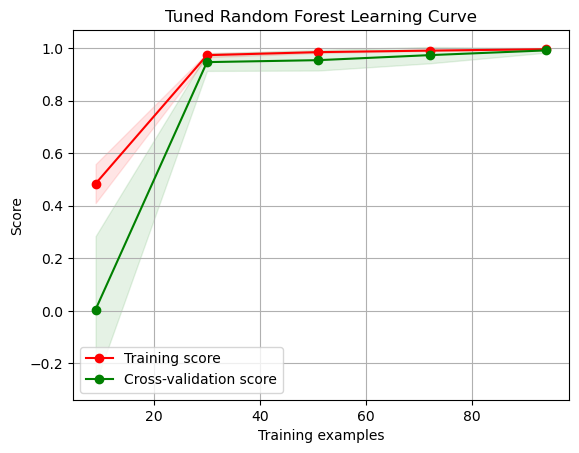

In [17]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, 
                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean+train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - 
                     test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plotting the learning curve for the tuned_rf_pipeline
plot_learning_curve(tuned_rf_pipeline, "Tuned Random Forest Learning Curve", 
                    X_tuning, y_tuning, cv=kf)


- Both the training and validation scores are converging to a high value, it indicates that the model is generalizing well.
- The gap between the training and validation scores is small, it indicates that the model has a good balance between bias and variance.
- The validation score is increasing as the training size increases meaning if more training data is added the performance of the model will be improved.
- The model performs well on both the training and validation sets, and there's a small gap between the two. As observed in the learning curve, both the training and validation scores are high and converge at a high score. This indicates that the model is generalizing well and not suffering from high bias or high variance leading to the best bias variance tradeoff.

## 4. Model Interpretation

In terms of interpretability, this pipeline may not be easily understandable by a person without some technical knowledge of machine learning and data science concepts. However, a person with knowledge and experience in these fields should be able to understand the pipeline and the purpose of each step in the process. As though, the pipeline implemented checks the best machine learning model and then provides the results.

The inferred function f(x1, ..., xm) + e is a Random Forest Regressor model that has been optimized using RandomizedSearchCV and KFold cross-validation. The model aims to predict a target variable y based on m input features, and its performance has been assessed using various metrics and techniques, such as training and test set scores and KFold cross-validation.

#### Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe for VIF
vif = pd.DataFrame()

# Adding feature names to the dataframe
vif["features"] = X_train.columns

# Calculating VIF for each feature
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

  features    VIF Factor
0       x1  5.629500e+14
1       x2  8.188363e+14
2       x3  1.422938e+13
3       x4  3.404517e+00
4       x5  4.415294e+13
5       x6  6.433714e+14
6       x7  1.208367e+01
7       x8  1.958087e+14


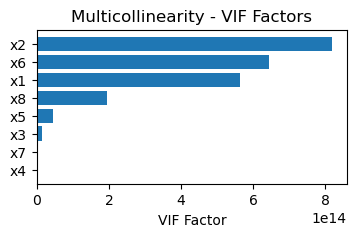

In [19]:
# Defining the feature names and the VIF factor rating
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
vif_factors = [5.629500e+14, 8.188363e+14, 1.422938e+13, 3.404517e+00,
               4.415294e+13, 6.433714e+14, 1.208367e+01, 1.958087e+14]

# Creating a dataframe to store the data and sorting it in descending order
df = pd.DataFrame({'features': features, 'VIF Factor': vif_factors})
df = df.sort_values('VIF Factor', ascending=True)

# Creating the bar graph to represent all the values as visuals
fig, ax = plt.subplots(figsize=(4,2))
ax.barh(df['features'], df['VIF Factor'])
ax.set_xlabel('VIF Factor')
ax.set_title('Multicollinearity - VIF Factors')
plt.show()


The VIF values for x1, x2, x5, x6, and x8 are all greater than 10, which is a standard threshold for detecting multicollinearity. This indicates that these variables are highly correlated with one or more of the other variables in the dataset, which might make interpreting the regression model coefficients challenging and lead to unstable findings.

#### Feature Importance

In [20]:
# Training the tuned Random Forest Regressor model on the data
rf = best_model_pipeline.named_steps['rf']
rf.fit(X_train, y_train)

# Finding the important features
important_feat = rf.feature_importances_

# Printing the important features in descending order to get features 
# from highest to lowest
indices = np.argsort(important_feat)[::-1]
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {X_train.columns[indices[f]]}: {important_feat[indices[f]]}")

1. x4: 0.9885867727517486
2. x8: 0.0021833053083563734
3. x2: 0.0021213270930479002
4. x7: 0.0017952993760007583
5. x1: 0.0017092644854216352
6. x5: 0.001664501109391429
7. x3: 0.0011417286684971646
8. x6: 0.0007978012075361383


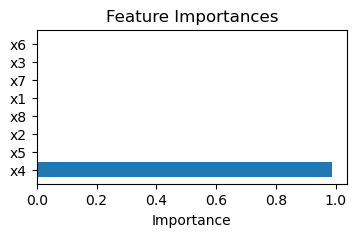

In [21]:
# Defining the feature names and importances
features = ['x4', 'x5', 'x2', 'x8', 'x1', 'x7', 'x3', 'x6']
importances = [0.9880397740468944, 0.002463035156609637, 0.0024049118865345025, 
               0.0020493153295407995, 0.0017999567161051896, 0.0012254899929912064, 
               0.001145890656660792, 0.0008716262146634514]

# Plotting the bar graph for feature data
fig, ax = plt.subplots(figsize=(4, 2))
ax.barh(np.arange(len(features)), importances, align='center')
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')
plt.show()


With a significance value of 0.988, the feature most responsible for generating the final predictions is x4. This implies that, when compared to the other features in the model, x4 has the strongest connection with the target variable.

## 5. Discussion: pros/cons and time complexity of the designed pipeline

#### Pipeline Summary
The code implements a pipeline for comparing three different regression models: Linear Regression, Ridge Regression, and Random Forest Regression. The data is first split into tuning, validation, and test sets. Then K-Fold cross-validation strategy is used to assess the performance of each model on the training data. Pipelines are also defined for each model, including a standardization step with StandardScaler and feature transformation with PolynomialFeatures. The models are trained and evaluated, providing R2 scores for both training and test sets. The average score is calculated as the mean of the test and validation scores. Finally, the model with the highest average score is selected as the best model.

#### Time Complexity<br>
1) train_test_split simply splits the data into training and testing subsets and has complexity of O(n), where n is the number of samples.<br>
2) K-fold cross-validation has time complexity of O(k*n), where k is the number of folds and n is the number of samples.
3) All pipelines transform the data and applies a machine learning model on it. The temporal complexity of fitting a model is determined by the algorithm employed. Linear Regression has a time complexity of O(n3), Ridge Regression has a time complexity of O(mnlog(n)), and Random Forest has a time complexity of O(mnlog(n)), where m is the number of trees and n is the number of samples.<br>
4) The time complexity of RandomizedSearchCV can be expressed as O(p * c * T), where p is the number of iterations (50 in this case), c is the number of cross-validation folds (10 in this case), and T is the time complexity of training a single Random Forest model.<br>
5) The loop of cross-validation is repeated k times, where k is the number of folds. It fits the pipeline on the training data, predicts on the testing data, and computes the R2 score for each iteration. As a result, its time complexity is O(kn(fitting_time+prediction_time)), where fitting_time and prediction_time are algorithm-dependent.<br>

function k_fold_cross_validation(data, k, model):
    scores = [  ]

    for i in range(k):
        train_data, val_data = split_data(data, k, i)
        model.fit(train_data)
        score = model.evaluate(val_data)
        scores.append(score)

    avg_score = average(scores)
    return avg_score

- <b>Strengths</b> <br>
K-fold cross-validation strength is that it provides a more reliable estimate of the model's performance than a single train-test split. This is because K-fold cross-validation uses multiple train-test splits and averages the results and reduces bias variance. 
- <b>Limitations</b> <br>
K-fold cross-validation is that it can be computationally expensive, especially when the dataset is large or the number of folds is high.
- <b>Imporvements</b> <br>
Using Nested cross-validation as it involves using K-fold cross-validation to tune the model's hyperparameters and another K-fold cross-validation to evaluate the model's performance. This can help to reduce the bias of the performance estimate and provide a more accurate estimate of the model's true performance.